In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Importing Basic Libraries

### 1.1) Read the dataset. Do the descriptive statistics and do null value condition check.

In [95]:
df=pd.read_excel('file:///C:/Users/RIKKI/Desktop/Notes/Datasets/Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
#Importing excel dataset 

In [96]:
data_dict=pd.read_excel('file:///C:/Users/RIKKI/Desktop/Notes/Datasets/Election_Data.xlsx')
#Importing Data Dictionary

In [97]:
pd.options.display.max_colwidth = 200
pd.set_option('display.max_columns', None)
data_dict

,**Data Dictionary**
0,1. vote: Party choice: Conservative or Labour
1,2. age: in years
2,"3. economic.cond.national: Assessment of current national economic conditions, 1 to 5."
3,"4. economic.cond.household: Assessment of current household economic conditions, 1 to 5."
4,"5. Blair: Assessment of the Labour leader, 1 to 5."
5,"6. Hague: Assessment of the Conservative leader, 1 to 5."
6,7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.
7,"8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3."
8,9. gender: female or male.


In [98]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [99]:
df.drop('Unnamed: 0',axis=1,inplace=True)
#Unnamed column is of no use. Hence we are dropping it

In [100]:
df.info()
#Here 2 features have object datatype. And rest are integer datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
vote                       1525 non-null object
age                        1525 non-null int64
economic.cond.national     1525 non-null int64
economic.cond.household    1525 non-null int64
Blair                      1525 non-null int64
Hague                      1525 non-null int64
Europe                     1525 non-null int64
political.knowledge        1525 non-null int64
gender                     1525 non-null object
dtypes: int64(7), object(2)
memory usage: 107.3+ KB


In [101]:
df.isnull().sum()
#No null values

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [102]:
df.duplicated().sum()
# 8 duplicated values. We will remove those values

8

In [103]:
df.drop_duplicates(inplace=True)
#Dropped all the duplicates value

In [11]:
print(df['vote'].value_counts())
print('\n')
print('Percentage of votes Labour party got is {} and Conservative is {}'.format((df['vote'].value_counts(normalize=True)[0])*100,(df['vote'].value_counts(normalize=True)[1])*100))

#We can cleary see that the Labour party has got more votes as compared to Conservative party

Labour          1057
Conservative     460
Name: vote, dtype: int64


Percentage of votes Labour party got is 69.67699406723797 and Conservative is 30.323005932762033


In [12]:
df['economic.cond.national'].value_counts()
# Max count occurs for category 3

3    604
4    538
2    256
5     82
1     37
Name: economic.cond.national, dtype: int64

In [13]:
df['economic.cond.household'].value_counts()
# Max count occurs for category 3

3    645
4    435
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64

In [14]:
df['Blair'].value_counts()
# Max count occurs for category 4

4    833
2    434
5    152
1     97
3      1
Name: Blair, dtype: int64

In [179]:
df['Hague'].value_counts()
# Max count occurs for category 2

2    624
4    558
1    233
5     73
3     37
Name: Hague, dtype: int64

In [180]:
df['Europe'].value_counts()
# Max count occurs for category 11

11    338
6     209
3     129
4     127
5     124
8     112
9     111
1     109
10    101
7      86
2      79
Name: Europe, dtype: int64

In [181]:
df['political.knowledge'].value_counts()
# Max count occurs for category 2

2    782
0    455
3    250
1     38
Name: political.knowledge, dtype: int64

In [182]:
df['gender'].value_counts()
#Female voters are comparitivaly more than Male voters

female    812
male      713
Name: gender, dtype: int64

### 1.2) Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers

Text(0, 0.5, 'Counts')

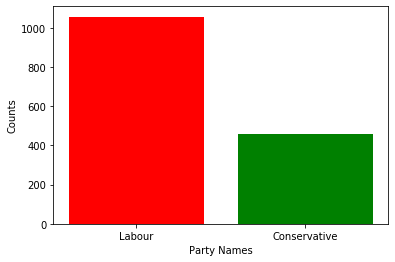

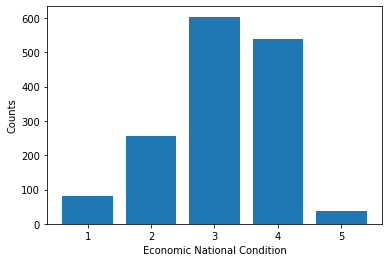

In [46]:
#fig,ax=plt.subplots(ncols=2)
plt.figure(1)
plt.bar(x=df['vote'].unique(), height=df['vote'].value_counts(),color=['Red','Green'])
plt.xlabel('Party Names')
plt.ylabel('Counts')
#We can clearly see that labour party has got more votes than cconservative


plt.figure(2)
plt.bar(x=df['economic.cond.national'].unique(), height=df['economic.cond.national'].value_counts())
plt.xlabel('Economic National Condition')
plt.ylabel('Counts')

# Economic National Condition for most people belongs to category no. - 3

Text(0, 0.5, 'Counts')

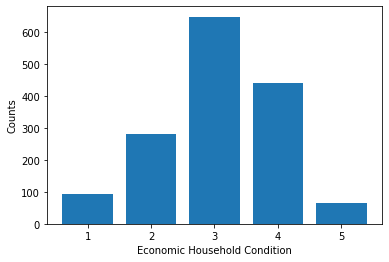

In [185]:
plt.bar(x=df['economic.cond.household'].unique(), height=df['economic.cond.household'].value_counts())
plt.xlabel('Economic Household Condition')
plt.ylabel('Counts')

# Economic Household Condition for most people belongs to category no. - 3

Text(0, 0.5, 'Counts')

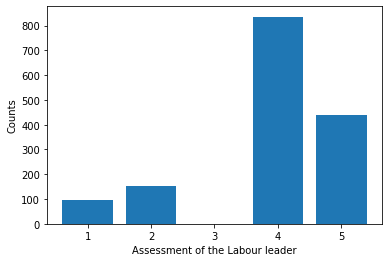

In [186]:
plt.bar(x=df['Blair'].unique(), height=df['Blair'].value_counts())
plt.xlabel('Assessment of the Labour leader')
plt.ylabel('Counts')

#Labour Leader is assessed mostly with ratings 4 and 5

Text(0, 0.5, 'Counts')

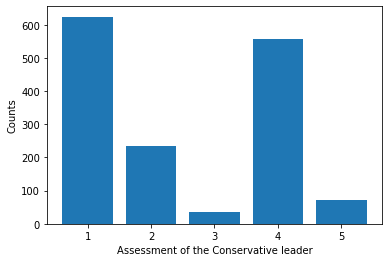

In [187]:
plt.bar(x=df['Hague'].unique(), height=df['Hague'].value_counts())
plt.xlabel('Assessment of the Conservative leader')
plt.ylabel('Counts')

#Conservative Leader is assessed mostly with ratings 1 and 4

#Looking at the assessment for both the leaders, Labour Leader is performing well

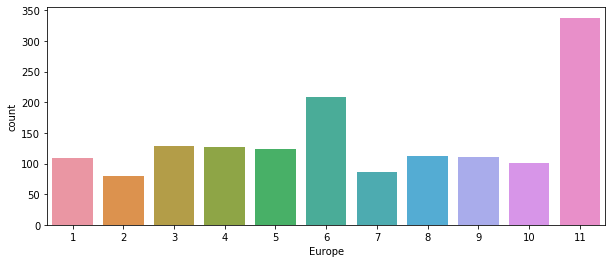

In [91]:
plt.figure(figsize=(10,4))
sns.countplot(df['Europe'])

#No. of counts corresponding 2 points is highest. Which shows that most of the people are in support of european integration

Text(0, 0.5, 'Counts')

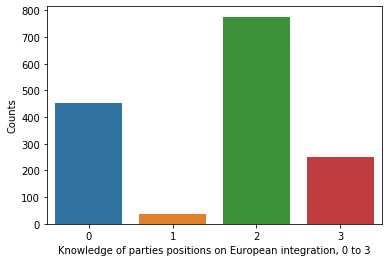

In [51]:
sns.countplot(df['political.knowledge'])
plt.xlabel('Knowledge of parties positions on European integration, 0 to 3')
plt.ylabel('Counts')

#Most of the people have knowledge about their parties position on European Integration 


Text(0.5, 0, 'Age')

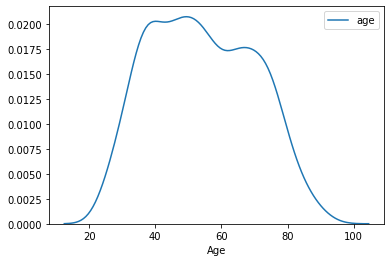

In [92]:
sns.kdeplot(df['age'])
plt.xlabel('Age')
#Age is normally distributed

Text(0, 0.5, 'Counts')

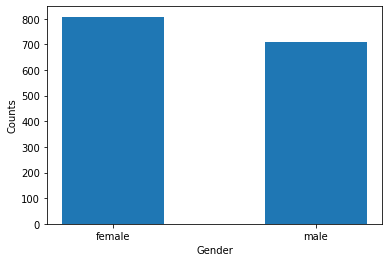

In [52]:
plt.bar(x=df['gender'].unique(), height=df['gender'].value_counts(),width=0.5)
plt.xlabel('Gender')
plt.ylabel('Counts')

#Female voters are more as compared to male voters .

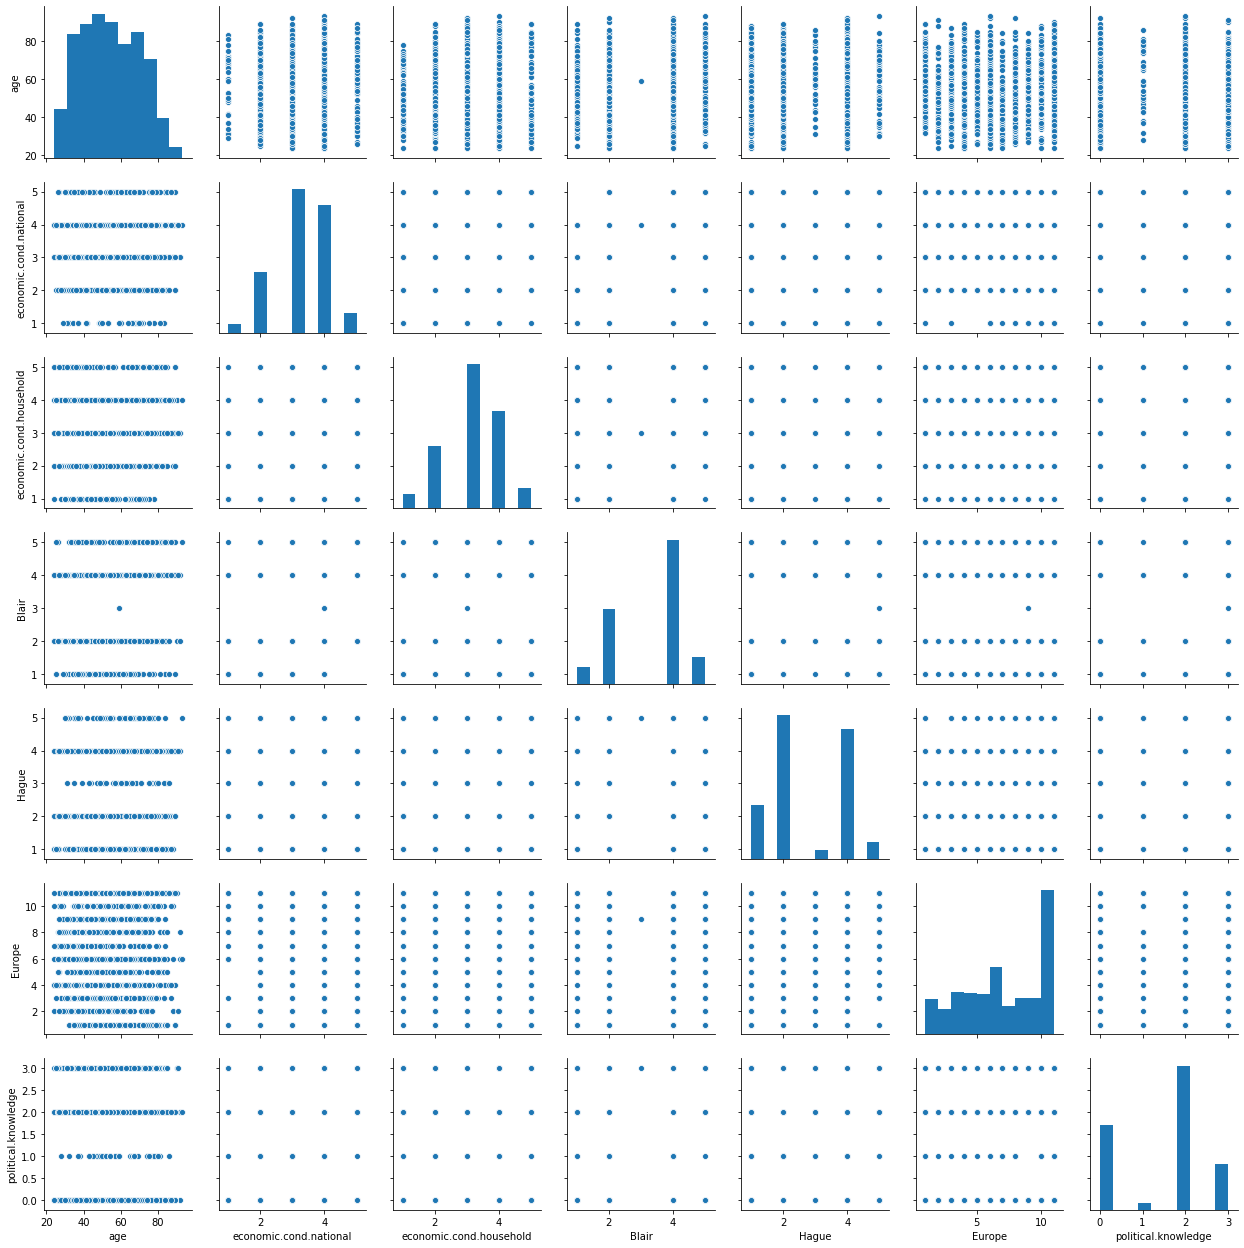

In [54]:
sns.pairplot(data=df)
#No correlations can be seen from the graph

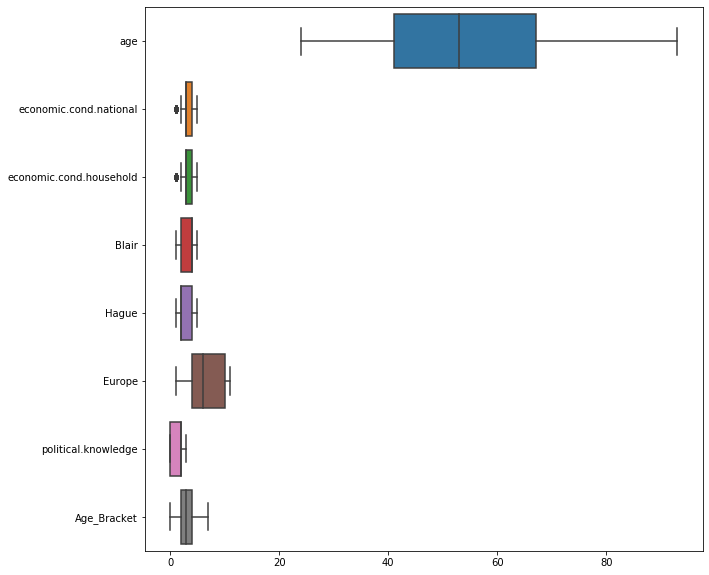

In [158]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,orient='h')
#From the boxplot we can see that economic.cond.national and economic.cond.household columns have some outliers.
#But as we know that these two columns are ordinal in nature, hence we will not going to treat those outliers.

In [15]:
df.describe(include='all')

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1517,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Labour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female
freq,1057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,808
mean,NaN,54.241266,3.245221,3.137772,3.335531,2.749506,6.740277,1.540541,NaN
std,NaN,15.701741,0.881792,0.931069,1.174772,1.232479,3.299043,1.084417,NaN
min,NaN,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN
25%,NaN,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,NaN
50%,NaN,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,NaN
75%,NaN,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,NaN


In [105]:
#Here we are introducing a new column as Age_Bracket which will tell us under which age range a particular voter is.
df['Age_Bracket']=pd.cut(df['age'],[20,30,40,50,60,70,80,90,100]) 

In [106]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,Age_Bracket
0,Labour,43,3,3,4,1,2,2,female,"(40, 50]"
1,Labour,36,4,4,4,4,5,2,male,"(30, 40]"
2,Labour,35,4,4,5,2,3,2,male,"(30, 40]"
3,Labour,24,4,2,2,1,4,0,female,"(20, 30]"
4,Labour,41,2,2,1,1,6,2,male,"(40, 50]"


In [107]:
df.duplicated().sum()

0

In [254]:
#df.drop('Age_Bracket',axis=1,inplace=True)

In [70]:
df=df.sort_values(by='age', ascending=True)

In [71]:
df=df.sort_index()

In [72]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,Age_Bracket
0,Labour,43,3,3,4,1,2,2,female,"(40, 50]"
1,Labour,36,4,4,4,4,5,2,male,"(30, 40]"
2,Labour,35,4,4,5,2,3,2,male,"(30, 40]"
3,Labour,24,4,2,2,1,4,0,female,"(20, 30]"
4,Labour,41,2,2,1,1,6,2,male,"(40, 50]"


In [108]:
#We can see that most of the voters have a age between 40-50
df['Age_Bracket'].value_counts()

(40, 50]     313
(30, 40]     285
(50, 60]     282
(60, 70]     275
(70, 80]     224
(20, 30]      76
(80, 90]      58
(90, 100]      4
Name: Age_Bracket, dtype: int64

In [109]:
#Changing the Age_Brackets into the codes
# 20,30 --> 0
# 30,40 --> 1
# 40,50 --> 2
# 50,60 --> 3
# 60,70 --> 4
# 70,80 --> 5
# 80,90 --> 6
# 90,100--> 7

print(df['Age_Bracket'].unique())
df['Age_Bracket']=pd.Categorical(df['Age_Bracket'],ordered=True).codes
print(df['Age_Bracket'].unique())

[(40, 50], (30, 40], (20, 30], (50, 60], (70, 80], (60, 70], (80, 90], (90, 100]]
Categories (8, interval[int64]): [(20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80] < (80, 90] < (90, 100]]
[2 1 0 3 5 4 6 7]


In [110]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,Age_Bracket
0,Labour,43,3,3,4,1,2,2,female,2
1,Labour,36,4,4,4,4,5,2,male,1
2,Labour,35,4,4,5,2,3,2,male,1
3,Labour,24,4,2,2,1,4,0,female,0
4,Labour,41,2,2,1,1,6,2,male,2


In [104]:
pd.DataFrame(df.groupby(['Age_Bracket'])['vote'].count())

,vote
Age_Bracket,
0,76
1,285
2,313
3,282
4,275
5,224
6,58
7,4


In [106]:
df['Age_Bracket'].value_counts()

2    313
1    285
3    282
4    275
5    224
0     76
6     58
7      4
Name: Age_Bracket, dtype: int64

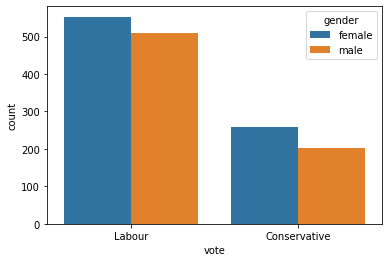

In [314]:
sns.countplot(df['vote'],hue=df['gender'])
#We can clearly see that female voters have voted more while voting for both the candidates

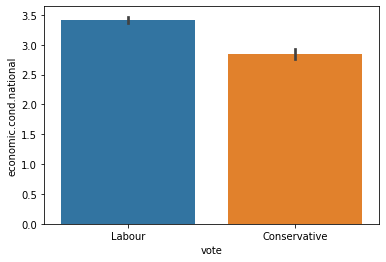

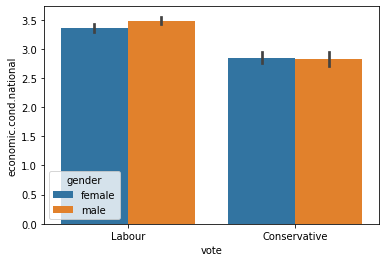

In [108]:
plt.figure(1)
sns.barplot(df['vote'],df['economic.cond.national'])
#Those who have voted for Labour party has higher Economic National Condition

plt.figure(2)
sns.barplot(df['vote'],df['economic.cond.national'],hue=df['gender'])
#No such clear distinction between gender can be made through this

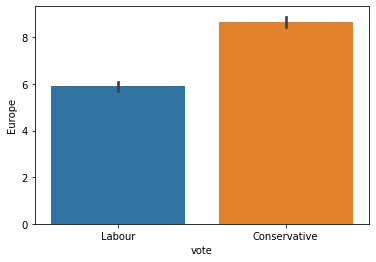

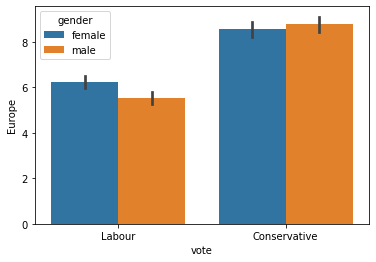

In [107]:
plt.figure(1)
sns.barplot(df['vote'],df['Europe'])
#Those who have voted for conservative party have higher Eurosceptic sentiments

plt.figure(2)
sns.barplot(df['vote'],df['Europe'],hue=df['gender'])
plt.show()
#There is not much variation between gender preferences in deciding  Eurosceptic sentiments

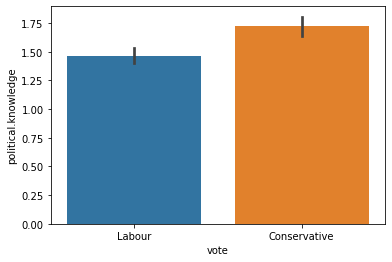

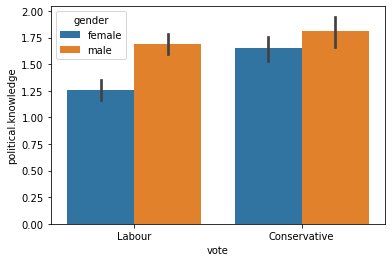

In [320]:
plt.figure(1)
sns.barplot(df['vote'],df['political.knowledge'])
#Voters those who have voted for Conservative party has higher knowledge of parties position on European integration

plt.figure(2)
sns.barplot(df['vote'],df['political.knowledge'],hue=df['gender'])
plt.show()

#Out of those who have voted got Labour & Conservative party,
#male has higher knowledge of parties position on European integration

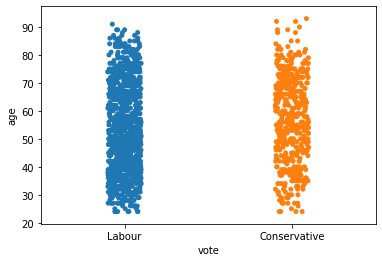

In [312]:
sns.stripplot(df['vote'],df['age'])


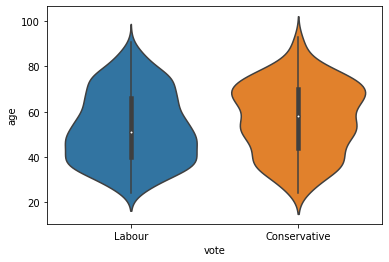

In [137]:

#Looking at the width of violin plot, those who have voted for Labour party, age of most of them lies near 40 to 50.
#Those who have voted for conservative party, age of most of them lies near 60 to 70.
sns.violinplot(df['vote'],df['age'])

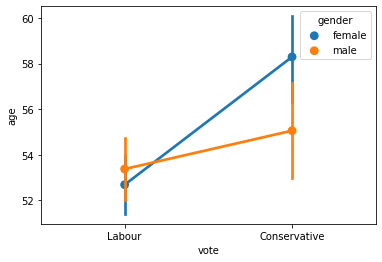

In [308]:

#Avg age of the female of those who have voted for Conservative party is higher than that of male
#Avg age of the female is somewhat near the avg age of male voters those who have voted for Labour party
sns.pointplot(df['vote'],df['age'],hue=df['gender'])

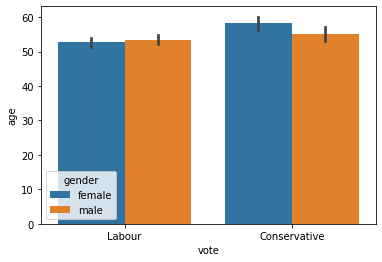

In [313]:
#Same as that of the above observation
sns.barplot(df['vote'],df['age'],hue=df['gender'])

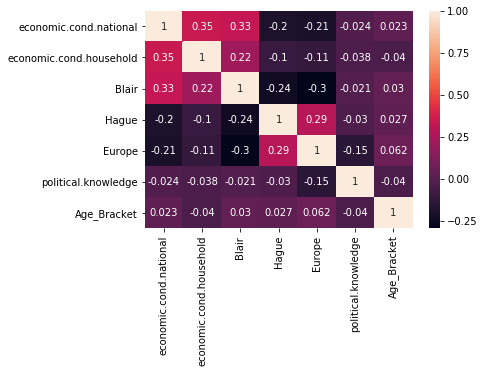

In [387]:
sns.heatmap(data=df.corr(),annot=True)
#There's no such correlation between any features 

In [111]:
df1=df.copy()

In [22]:
#In this first iteration of test, here we are dropping Age column and will going to work with rest other columns

In [23]:
df1.drop(['age'],axis=1,inplace=True)

In [24]:
df1.head()

,vote,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,Age_Bracket
0,Labour,3,3,4,1,2,2,female,2
1,Labour,4,4,4,4,5,2,male,1
2,Labour,4,4,5,2,3,2,male,1
3,Labour,4,2,2,1,4,0,female,0
4,Labour,2,2,1,1,6,2,male,2


In [25]:
#Assigning codes to those columns which had object datatype
for col in df1.columns: 
    if df1[col].dtype == 'object': 
        print('\n')
        print('Column Name:',col)
        print(pd.Categorical(df1[col].unique()))
        print(pd.Categorical(df1[col].unique()).codes)
        df1[col] = pd.Categorical(df1[col]).codes



Column Name: vote
[Labour, Conservative]
Categories (2, object): [Conservative, Labour]
[1 0]


Column Name: gender
[female, male]
Categories (2, object): [female, male]
[0 1]


In [26]:
#After encoding , 
#Labour --> 1
#Conservative --> 0
#female --> 0
#male --> 1

In [27]:
df1.head()

,vote,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,Age_Bracket
0,1,3,3,4,1,2,2,0,2
1,1,4,4,4,4,5,2,1,1
2,1,4,4,5,2,3,2,1,1
3,1,4,2,2,1,4,0,0,0
4,1,2,2,1,1,6,2,1,2


#### Separating Data into X and Y variables 

In [28]:
x=df1.drop(['vote'],axis=1)


In [29]:
y=df1.pop('vote')

In [30]:
y.value_counts(normalize=True)
#Not a case of unbalanced problem

1    0.69677
0    0.30323
Name: vote, dtype: float64

### 1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

#### Scaling is necessary  for those algorithms which are distance based or weight based models. As we are going to use models such as KNN, SVM and boosting , scaling will be needed for those models as they are distance based. But for our first iteration we will not going to perform scaling and will compare the results with second iteration of model. One more thing to note is that , scales of all the features are in similar range so we can skip the scaling in this problem. But in general its a good practice to scale the model.

#### Splitting of Data

In [31]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [37]:
y_train.value_counts(normalize=True)
#Not a case of unbalanced problem

1    0.690858
0    0.309142
Name: vote, dtype: float64

### 1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis).

### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
Log_reg=LogisticRegression(tol=0.00001,max_iter =2000,random_state=0)

In [38]:
Log_reg=Log_reg.fit(x_train,y_train)

In [39]:
y_train_predict=Log_reg.predict(x_train)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.81      0.66      0.73       328
           1       0.86      0.93      0.89       733

    accuracy                           0.85      1061
   macro avg       0.84      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061



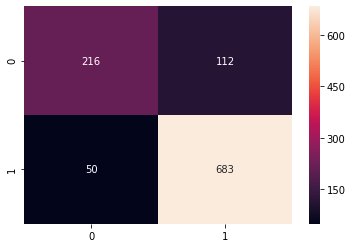

In [210]:
print(sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True,fmt='2g'))
print(classification_report(y_train,y_train_predict))

In [41]:
print(confusion_matrix(y_test,Log_reg.predict(x_test)))
print(classification_report(y_test,Log_reg.predict(x_test)))

[[ 86  46]
 [ 30 294]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       132
           1       0.86      0.91      0.89       324

    accuracy                           0.83       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.83      0.83      0.83       456



In [42]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train_predict, y_train))

0.16588124410933083


In [43]:
print(mean_squared_error(Log_reg.predict(x_test), y_test))

0.16666666666666666


### Defining a function to plot roc_curve and calculate roc_auc_score

In [44]:
from sklearn.metrics import roc_auc_score,roc_curve

In [45]:
def roc_plot(model_name,x_data,y_lables):
    probs1=model_name.predict_proba(x_data)
    probs1=probs1[:,1]
    print('roc_auc_score -->',roc_auc_score(y_lables,probs1))
    fpr,tpr,thresholds=roc_curve(y_lables,probs1)
    plt.plot([0,1],[0,1],linestyle='--')
    plt.plot(fpr,tpr,marker='.')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC')
    plt.show()

#model_name is the name of the model, x_data is the data that needs to be passed and y_labels is the class values

Scores and Curve for Testing data is 
roc_auc_score --> 0.8873302998036802


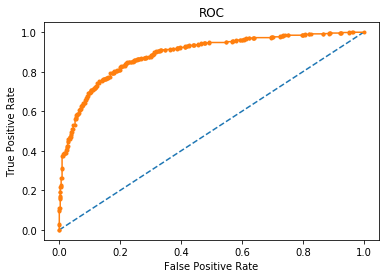

In [206]:
print('Scores and Curve for Training data is ')
roc_plot(Log_reg,x_train,y_train)

Scores and Curve for Testing data is 
roc_auc_score --> 0.8902333520389075


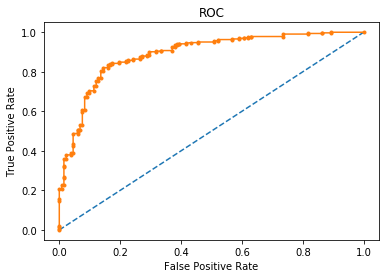

In [207]:
print('Scores and Curve for Testing data is ')
roc_plot(Log_reg,x_test,y_test)

In [ ]:
#Using SMOTE analysis to see whether there is any improvement in results or not. Generally there should not be any improvement
#SMOTE technique is used where there is a case of unbalanced problem . As in this case the classes are not imbalanced hence 
# this technque will not be of much use. But still let us see the results using SMOTE

In [220]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [221]:
sm = SMOTE(random_state=0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

In [211]:
y_train_res.value_counts(normalize=True)

1    0.5
0    0.5
Name: vote, dtype: float64

In [212]:
Log_reg_smote=LogisticRegression(tol=0.00001,max_iter =2000)

In [213]:
Log_reg_smote=Log_reg_smote.fit(x_train_res, y_train_res)

In [282]:
print(confusion_matrix(Log_reg_smote.predict(x_train_res),y_train_res))
print(classification_report(Log_reg_smote.predict(x_train_res),y_train_res))

[[598 131]
 [135 602]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       729
           1       0.82      0.82      0.82       737

    accuracy                           0.82      1466
   macro avg       0.82      0.82      0.82      1466
weighted avg       0.82      0.82      0.82      1466



In [281]:
print(confusion_matrix(Log_reg_smote.predict(x_test),y_test))
print(classification_report(Log_reg_smote.predict(x_test),y_test))

[[109  55]
 [ 23 269]]
              precision    recall  f1-score   support

           0       0.83      0.66      0.74       164
           1       0.83      0.92      0.87       292

    accuracy                           0.83       456
   macro avg       0.83      0.79      0.80       456
weighted avg       0.83      0.83      0.82       456



#### We can clearly see that there is no improvement in the performance while trying to use SMOTE technique

### Linear Discriminant Analysis

In [145]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [219]:
lda=LinearDiscriminantAnalysis()

In [220]:
lda=lda.fit(x_train,y_train)

In [280]:
print(confusion_matrix(lda.predict(x_train),y_train))
print(classification_report(lda.predict(x_train),y_train))

[[222  72]
 [106 661]]
              precision    recall  f1-score   support

           0       0.68      0.76      0.71       294
           1       0.90      0.86      0.88       767

    accuracy                           0.83      1061
   macro avg       0.79      0.81      0.80      1061
weighted avg       0.84      0.83      0.83      1061



In [279]:
print(confusion_matrix(lda.predict(x_test),y_test))
print(classification_report(lda.predict(x_test),y_test))

[[ 87  31]
 [ 45 293]]
              precision    recall  f1-score   support

           0       0.66      0.74      0.70       118
           1       0.90      0.87      0.89       338

    accuracy                           0.83       456
   macro avg       0.78      0.80      0.79       456
weighted avg       0.84      0.83      0.84       456



Scores and Curve for Training data is 
roc_auc_score --> 0.8872263168402489


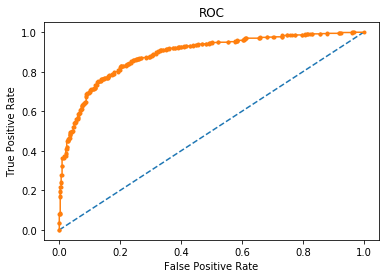

In [226]:
print('Scores and Curve for Training data is ')
roc_plot(lda,x_train,y_train)

Scores and Curve for Testing data is 
roc_auc_score --> 0.8908179012345678


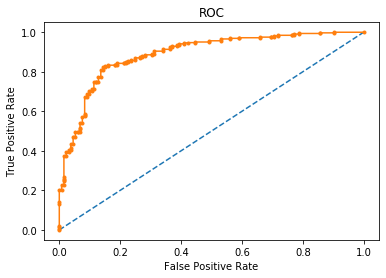

In [227]:
print('Scores and Curve for Testing data is ')
roc_plot(lda,x_test,y_test)

In [230]:
#Using SMOTE
lda_smote=LinearDiscriminantAnalysis()

In [231]:
lda_smote=lda_smote.fit(x_train_res,y_train_res)

In [277]:
print(confusion_matrix(lda_smote.predict(x_train_res),y_train_res))
print(classification_report(lda_smote.predict(x_train_res),y_train_res))

[[600 134]
 [133 599]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       734
           1       0.82      0.82      0.82       732

    accuracy                           0.82      1466
   macro avg       0.82      0.82      0.82      1466
weighted avg       0.82      0.82      0.82      1466



In [276]:
print(classification_report(lda_smote.predict(x_test),y_test))
print(confusion_matrix(lda_smote.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.84      0.67      0.74       166
           1       0.83      0.93      0.88       290

    accuracy                           0.83       456
   macro avg       0.84      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456

[[111  55]
 [ 21 269]]


In [236]:
#We can clearly see that there is no improvement in the performance while trying to use SMOTE technique. Rather the performance
# has decreased

### 1.5) Apply KNN Model, Naïve Bayes Model and Support Vector Machine (SVM) model.

### KNN

In [146]:
from sklearn.neighbors import KNeighborsClassifier

In [238]:
KNN=KNeighborsClassifier()

In [239]:
KNN=KNN.fit(x_train, y_train)

In [275]:
print(confusion_matrix(KNN.predict(x_train),y_train))
print(classification_report(KNN.predict(x_train),y_train))

[[243  57]
 [ 85 676]]
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       300
           1       0.92      0.89      0.90       761

    accuracy                           0.87      1061
   macro avg       0.83      0.85      0.84      1061
weighted avg       0.87      0.87      0.87      1061



In [274]:
print(confusion_matrix(KNN.predict(x_test),y_test))
print(classification_report(KNN.predict(x_test),y_test))

[[ 85  38]
 [ 47 286]]
              precision    recall  f1-score   support

           0       0.64      0.69      0.67       123
           1       0.88      0.86      0.87       333

    accuracy                           0.81       456
   macro avg       0.76      0.77      0.77       456
weighted avg       0.82      0.81      0.82       456



Scores and Curve for Training data is 
roc_auc_score --> 0.9385959804345656


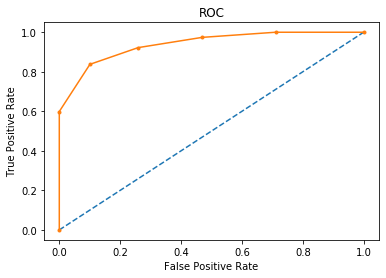

In [247]:
print('Scores and Curve for Training data is ')
roc_plot(KNN,x_train,y_train)

Scores and Curve for Testing data is 
roc_auc_score --> 0.8702066965955855


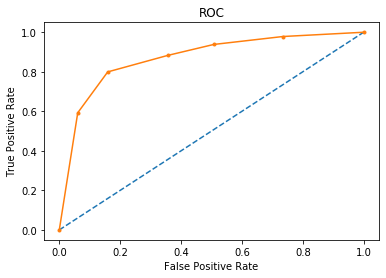

In [248]:
print('Scores and Curve for Testing data is ')
roc_plot(KNN,x_test,y_test)

In [251]:
#Using SMOTE technique
KNN_smote=KNeighborsClassifier()

In [252]:
KNN_smote=KNN_smote.fit(x_train_res, y_train_res)

In [273]:
print(confusion_matrix(KNN_smote.predict(x_train_res),y_train_res))
print(classification_report(KNN_smote.predict(x_train_res),y_train_res))

[[684 112]
 [ 49 621]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       796
           1       0.85      0.93      0.89       670

    accuracy                           0.89      1466
   macro avg       0.89      0.89      0.89      1466
weighted avg       0.89      0.89      0.89      1466



In [272]:
print(confusion_matrix(KNN_smote.predict(x_test),y_test))
print(classification_report(KNN_smote.predict(x_test),y_test))

[[100  64]
 [ 32 260]]
              precision    recall  f1-score   support

           0       0.76      0.61      0.68       164
           1       0.80      0.89      0.84       292

    accuracy                           0.79       456
   macro avg       0.78      0.75      0.76       456
weighted avg       0.79      0.79      0.78       456



In [257]:
#We can clearly see that there is no improvement in the performance while trying to use SMOTE technique. Rather the performance
# has decreased

### Naive Bayes

In [147]:
from sklearn.naive_bayes import GaussianNB

In [212]:
gNB=GaussianNB()

In [213]:
gNB= gNB.fit(x_train, y_train)

In [214]:
print(confusion_matrix(gNB.predict(x_train),y_train))
print(classification_report(gNB.predict(x_train),y_train))

[[229  86]
 [ 99 647]]
              precision    recall  f1-score   support

           0       0.70      0.73      0.71       315
           1       0.88      0.87      0.87       746

    accuracy                           0.83      1061
   macro avg       0.79      0.80      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [215]:
print(confusion_matrix(gNB.predict(x_test),y_test))
print(classification_report(gNB.predict(x_test),y_test))


[[ 94  33]
 [ 38 291]]
              precision    recall  f1-score   support

           0       0.71      0.74      0.73       127
           1       0.90      0.88      0.89       329

    accuracy                           0.84       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.85      0.84      0.85       456



Scores and Curve for Training data is 
roc_auc_score --> 0.8829380594283431


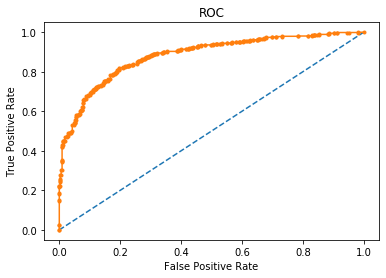

In [216]:
print('Scores and Curve for Training data is ')
roc_plot(gNB,x_train,y_train)

Scores and Curve for Testing data is 
roc_auc_score --> 0.8861415076692855


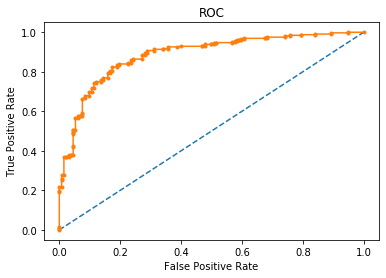

In [217]:
print('Scores and Curve for Testing data is ')
roc_plot(gNB,x_test,y_test)

In [218]:
gNB_SMOTE=GaussianNB()

In [222]:
gNB_SMOTE= gNB_SMOTE.fit(x_train_res, y_train_res)

In [290]:
print(confusion_matrix(gNB_SMOTE.predict(x_train_res),y_train_res))
print(classification_report(gNB_SMOTE.predict(x_train_res),y_train_res))

[[522  86]
 [211 647]]
              precision    recall  f1-score   support

           0       0.71      0.86      0.78       608
           1       0.88      0.75      0.81       858

    accuracy                           0.80      1466
   macro avg       0.80      0.81      0.80      1466
weighted avg       0.81      0.80      0.80      1466



In [291]:
print(confusion_matrix(gNB_SMOTE.predict(x_test),y_test))
print(classification_report(gNB_SMOTE.predict(x_test),y_test))

[[ 94  33]
 [ 38 291]]
              precision    recall  f1-score   support

           0       0.71      0.74      0.73       127
           1       0.90      0.88      0.89       329

    accuracy                           0.84       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.85      0.84      0.85       456



In [ ]:
# No improvement in the performance while trying to use SMOTE technique

### Support Vector Machine

In [148]:
from sklearn.svm import SVC

In [293]:
SVM_model=SVC(random_state =0,probability=True)

In [294]:
SVM_model=SVM_model.fit(x_train,y_train)
model_score = SVM_model.score(x_train, y_train)
print(model_score)
print(confusion_matrix(SVM_model.predict(x_train),y_train))
print(classification_report(SVM_model.predict(x_train),y_train))


0.8407163053722903
[[217  58]
 [111 675]]
              precision    recall  f1-score   support

           0       0.66      0.79      0.72       275
           1       0.92      0.86      0.89       786

    accuracy                           0.84      1061
   macro avg       0.79      0.82      0.80      1061
weighted avg       0.85      0.84      0.84      1061



In [295]:
print(confusion_matrix(SVM_model.predict(x_test),y_test))
print(classification_report(SVM_model.predict(x_test),y_test))

[[ 88  30]
 [ 44 294]]
              precision    recall  f1-score   support

           0       0.67      0.75      0.70       118
           1       0.91      0.87      0.89       338

    accuracy                           0.84       456
   macro avg       0.79      0.81      0.80       456
weighted avg       0.85      0.84      0.84       456



Scores and Curve for Training data is 
roc_auc_score --> 0.9038490333743718


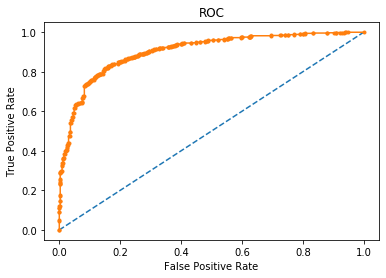

In [300]:
print('Scores and Curve for Training data is ')
roc_plot(SVM_model,x_train,y_train)

Scores and Curve for Testing data is 
roc_auc_score --> 0.8950734193789749


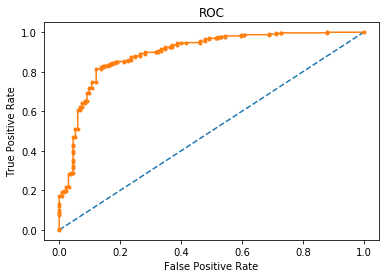

In [301]:
print('Scores and Curve for Testing data is ')
roc_plot(SVM_model,x_test,y_test)

In [306]:
SVM_model_smote=SVC(random_state =0,probability=True)

In [307]:
SVM_model_smote=SVM_model_smote.fit(x_train_res,y_train_res)
model_score = SVM_model_smote.score(x_train_res, y_train_res)
print(model_score)
print(confusion_matrix(SVM_model_smote.predict(x_train_res),y_train_res))
print(classification_report(SVM_model_smote.predict(x_train_res),y_train_res))


0.8431105047748977
[[646 143]
 [ 87 590]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       789
           1       0.80      0.87      0.84       677

    accuracy                           0.84      1466
   macro avg       0.84      0.85      0.84      1466
weighted avg       0.85      0.84      0.84      1466



In [308]:
model_score_test = SVM_model_smote.score(x_test, y_test)
print(model_score_test)
print(confusion_matrix(SVM_model_smote.predict(x_test),y_test))
print(classification_report(SVM_model_smote.predict(x_test),y_test))

0.8267543859649122
[[110  57]
 [ 22 267]]
              precision    recall  f1-score   support

           0       0.83      0.66      0.74       167
           1       0.82      0.92      0.87       289

    accuracy                           0.83       456
   macro avg       0.83      0.79      0.80       456
weighted avg       0.83      0.83      0.82       456



Scores and Curve for Training smote data is 
roc_auc_score --> 0.917758413070061


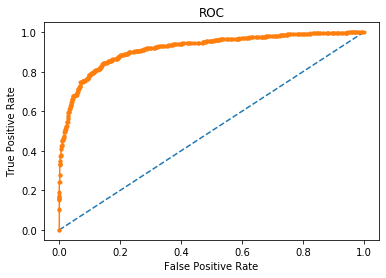

In [310]:
print('Scores and Curve for Training smote data is ')
roc_plot(SVM_model_smote,x_train_res,y_train_res)

Scores and Curve for Testing smote data is 
roc_auc_score --> 0.9005915637860082


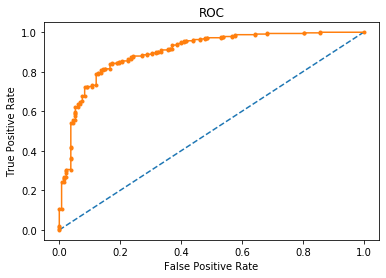

In [311]:
print('Scores and Curve for Testing smote data is ')
roc_plot(SVM_model_smote,x_test,y_test)

In [ ]:
# The model has performed similar to the original SVM model

### 1.6) Model Tuning, Bagging and Boosting.

### Ada-boosting - Using Cross Validation

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [337]:
param_grid = {
    'n_estimators' : [100,500,1000],
    'learning_rate' : [0.1,0.01,0.001],
    'algorithm' : ['SAMME', 'SAMME.R']
}

In [339]:
ADB_model=AdaBoostClassifier()

In [340]:
grid_search=GridSearchCV(estimator=ADB_model,param_grid=param_grid)

In [341]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [351]:
ADB_model=grid_search.best_estimator_

In [352]:
ADB_model.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=500, random_state=None)

In [354]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(x_train)
model_score = ADB_model.score(x_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.8397737983034873
[[230  98]
 [ 72 661]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       328
           1       0.87      0.90      0.89       733

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061



Scores and Curve for Training data is 
roc_auc_score --> 0.9031065950154726


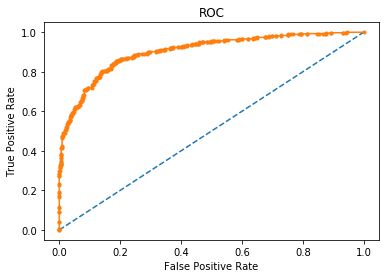

In [355]:
print('Scores and Curve for Training data is ')
roc_plot(ADB_model,x_train, y_train)

In [356]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(x_test)
model_score = ADB_model.score(x_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.8355263157894737
[[ 88  44]
 [ 31 293]]
              precision    recall  f1-score   support

           0       0.74      0.67      0.70       132
           1       0.87      0.90      0.89       324

    accuracy                           0.84       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.83      0.84      0.83       456



Scores and Curve for Testing data is 
roc_auc_score --> 0.8890876356154134


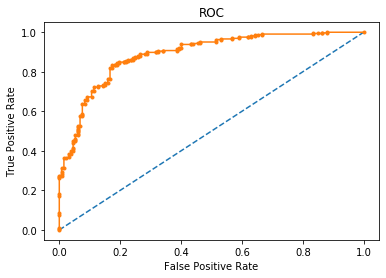

In [357]:
print('Scores and Curve for Testing data is ')
roc_plot(ADB_model,x_test, y_test)

### XGboost - Using Cross Validation

In [150]:
import xgboost as xgb

In [359]:
param_grid = {
    'min_child_weight' : [10,20,30],
    'max_depth':[5,10,15],
    'learning_rate' : [0.1,0.01,0.001],
    'n_estimators' : [ 500,1000,2000],
    'random_state' : [0]
}

In [360]:
XGB_model=xgb.XGBClassifier()

In [362]:
grid_search=GridSearchCV(estimator=XGB_model,param_grid=param_grid)

In [363]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_es...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid=

In [365]:
XGB_model=grid_search.best_estimator_

In [366]:
XGB_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=20, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [367]:
## Performance Matrix on train data set
y_train_predict = XGB_model.predict(x_train)
model_score = XGB_model.score(x_train, y_train)
print(model_score)
print( confusion_matrix(y_train, y_train_predict))
print( classification_report(y_train, y_train_predict))

0.8510838831291234
[[234  94]
 [ 64 669]]
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       328
           1       0.88      0.91      0.89       733

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [368]:
## Performance Matrix on test data set
y_test_predict = XGB_model.predict(x_test)
model_score = XGB_model.score(x_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.8421052631578947
[[ 95  37]
 [ 35 289]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       132
           1       0.89      0.89      0.89       324

    accuracy                           0.84       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456



Scores and Curve for Training data is 
roc_auc_score --> 0.9112671779855589


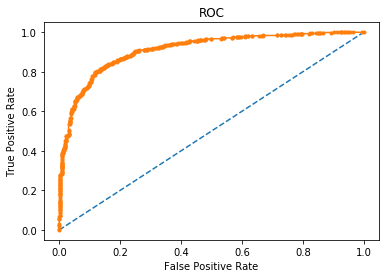

In [369]:
print('Scores and Curve for Training data is ')
roc_plot(XGB_model,x_train, y_train)

Scores and Curve for Testing data is 
roc_auc_score --> 0.8886083052749719


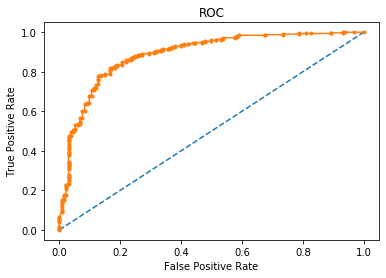

In [370]:
print('Scores and Curve for Testing data is ')
roc_plot(XGB_model,x_test, y_test)

### Decision Tree

In [151]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [0]
}

In [56]:
DT_model= DecisionTreeClassifier()

In [57]:
grid_search=GridSearchCV(estimator=DT_model,param_grid=param_grid,cv=10)

In [58]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 10, 15, 20],
                      

In [60]:
DT_model=grid_search.best_estimator_

In [61]:
DT_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=70,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [62]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(x_train)
model_score = DT_model.score(x_train, y_train)
print(model_score)
print( confusion_matrix(y_train, y_train_predict))
print( classification_report(y_train, y_train_predict))

0.8284637134778511
[[232  96]
 [ 86 647]]
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       328
           1       0.87      0.88      0.88       733

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



roc_auc_score --> 0.8952912354839784


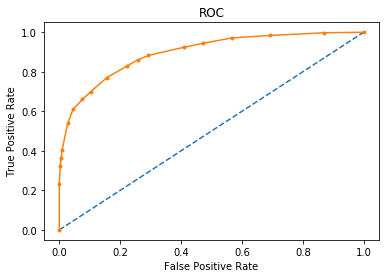

In [66]:
roc_plot(DT_model,x_train, y_train)

In [64]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(x_test)
model_score = DT_model.score(x_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.8399122807017544
[[ 94  38]
 [ 35 289]]
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       132
           1       0.88      0.89      0.89       324

    accuracy                           0.84       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.84      0.84      0.84       456



roc_auc_score --> 0.8797231575009353


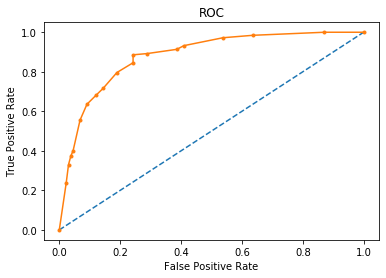

In [67]:
roc_plot(DT_model,x_test, y_test)

### Random Forest

In [152]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [0]
}

In [73]:
RF_model=RandomForestClassifier()

In [74]:
grid_search=GridSearchCV(estimator=RF_model,param_grid=param_grid,cv=10)

In [75]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [76]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [77]:
RF_model=grid_search.best_estimator_

In [78]:
RF_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [79]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(x_train)
model_score =RF_model.score(x_train, y_train)
print(model_score)
print( confusion_matrix(y_train, y_train_predict))
print( classification_report(y_train, y_train_predict))

0.8473138548539114
[[216 112]
 [ 50 683]]
              precision    recall  f1-score   support

           0       0.81      0.66      0.73       328
           1       0.86      0.93      0.89       733

    accuracy                           0.85      1061
   macro avg       0.84      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061



Scores and Curve for Training data is 
roc_auc_score --> 0.9139333011679366


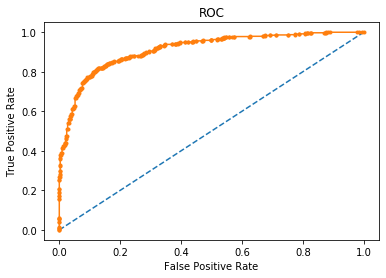

In [84]:
print('Scores and Curve for Training data is ')
roc_plot(RF_model,x_train,y_train)

In [81]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(x_test)
model_score = RF_model.score(x_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.8377192982456141
[[ 84  48]
 [ 26 298]]
              precision    recall  f1-score   support

           0       0.76      0.64      0.69       132
           1       0.86      0.92      0.89       324

    accuracy                           0.84       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.83      0.84      0.83       456



Scores and Curve for Testing data is 
roc_auc_score --> 0.8916128881406659


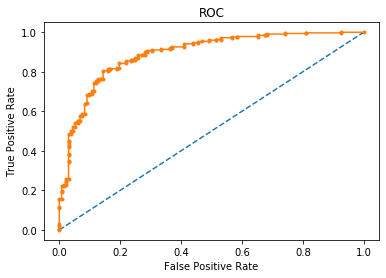

In [85]:
print('Scores and Curve for Testing data is ')
roc_plot(RF_model,x_test,y_test)

### ITERATION NO. 2 

In [93]:
#In this we will going to going to use Age column instead of Age_Bracket columns that we have created.
#Moreover we will going to Normalize all the columns using Min Max scaler except the Dependent variable i.e Vote column
#and Gender column. For these 2 columns we will going to apply encoding.

In [115]:
df3=df.copy()

In [117]:
df3.drop(['Age_Bracket'],axis=1,inplace=True)

In [119]:
df3.head(4)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female


In [120]:
#Assigning codes to those columns which had object datatype
for col in df3.columns: 
    if df3[col].dtype == 'object': 
        print('\n')
        print('Column Name:',col)
        print(pd.Categorical(df3[col].unique()))
        print(pd.Categorical(df3[col].unique()).codes)
        df3[col] = pd.Categorical(df3[col]).codes



Column Name: vote
[Labour, Conservative]
Categories (2, object): [Conservative, Labour]
[1 0]


Column Name: gender
[female, male]
Categories (2, object): [female, male]
[0 1]


In [121]:
df3.head(1)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0


In [122]:
from sklearn.preprocessing import MinMaxScaler

In [123]:
minmax=MinMaxScaler()

In [126]:
for i in df3.iloc[:,1:8]:
    df3[[i]]=minmax.fit_transform(df3[[i]])
    

In [127]:
df3.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,0
1,1,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,1
2,1,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,1
3,1,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,0
4,1,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,1


In [129]:
X=df3.drop(['vote'],axis=1)

In [130]:
Y=df3.pop('vote')

In [133]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

### 1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis).

### Logistic Regression

In [139]:
Log_reg1=LogisticRegression(tol=0.00001,max_iter =2000,random_state=0)
Log_reg1.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=1e-05, verbose=0,
                   warm_start=False)

In [140]:
print(confusion_matrix(Y_train,Log_reg1.predict(X_train)))
print(classification_report(Y_train,Log_reg1.predict(X_train)))

[[215 113]
 [ 66 667]]
              precision    recall  f1-score   support

           0       0.77      0.66      0.71       328
           1       0.86      0.91      0.88       733

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [141]:
print(confusion_matrix(Y_test,Log_reg1.predict(X_test)))
print(classification_report(Y_test,Log_reg1.predict(X_test)))

[[ 84  48]
 [ 28 296]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       132
           1       0.86      0.91      0.89       324

    accuracy                           0.83       456
   macro avg       0.81      0.77      0.79       456
weighted avg       0.83      0.83      0.83       456



Scores and Curve for Training data is 
roc_auc_score --> 0.8876692842644661


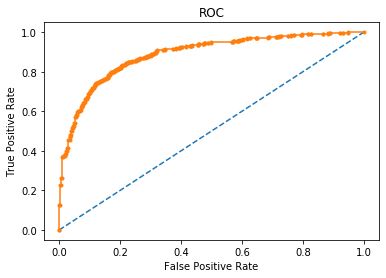

In [142]:
print('Scores and Curve for Training data is ')
roc_plot(Log_reg1,X_train,Y_train)

Scores and Curve for Testing data is 
roc_auc_score --> 0.8908295922184811


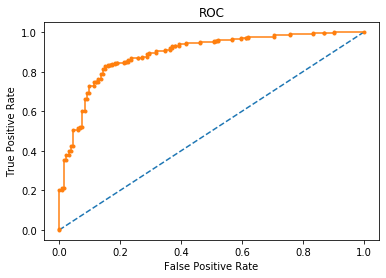

In [158]:
print('Scores and Curve for Testing data is ')
roc_plot(Log_reg1,X_test,Y_test)

### LDA

In [154]:
lda1=LinearDiscriminantAnalysis()
lda1.fit(X_train,Y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [155]:
print(confusion_matrix(Y_train,lda1.predict(X_train)))
print(classification_report(Y_train,lda1.predict(X_train)))

[[222 106]
 [ 73 660]]
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       328
           1       0.86      0.90      0.88       733

    accuracy                           0.83      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [156]:
print(confusion_matrix(Y_test,lda1.predict(X_test)))
print(classification_report(Y_test,lda1.predict(X_test)))

[[ 87  45]
 [ 31 293]]
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       132
           1       0.87      0.90      0.89       324

    accuracy                           0.83       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.83      0.83      0.83       456



Scores and Curve for Training data is 
roc_auc_score --> 0.887353176055635


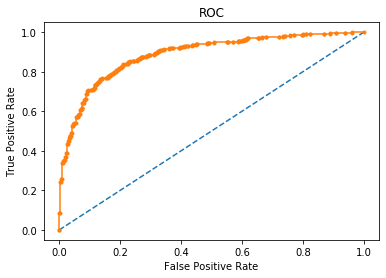

In [157]:
print('Scores and Curve for Training data is ')
roc_plot(lda1,X_train,Y_train)

Scores and Curve for Testing data is 
roc_auc_score --> 0.8911101758323982


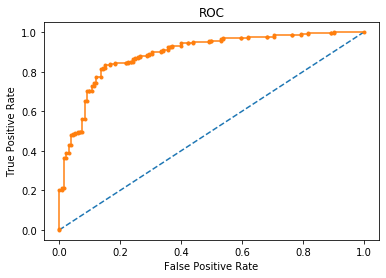

In [159]:
print('Scores and Curve for Testing data is ')
roc_plot(lda1,X_test,Y_test)

### 1.5) Apply KNN Model, Naïve Bayes Model and Support Vector Machine (SVM) model.

### KNN

In [160]:
KNN1=KNeighborsClassifier()
KNN1.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [161]:
print(confusion_matrix(Y_train,KNN1.predict(X_train)))
print(classification_report(Y_train,KNN1.predict(X_train)))

[[255  73]
 [ 57 676]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       328
           1       0.90      0.92      0.91       733

    accuracy                           0.88      1061
   macro avg       0.86      0.85      0.85      1061
weighted avg       0.88      0.88      0.88      1061



In [162]:
print(confusion_matrix(Y_test,KNN1.predict(X_test)))
print(classification_report(Y_test,KNN1.predict(X_test)))

[[ 92  40]
 [ 41 283]]
              precision    recall  f1-score   support

           0       0.69      0.70      0.69       132
           1       0.88      0.87      0.87       324

    accuracy                           0.82       456
   macro avg       0.78      0.79      0.78       456
weighted avg       0.82      0.82      0.82       456



Scores and Curve for Training data is 
roc_auc_score --> 0.9378036302532194


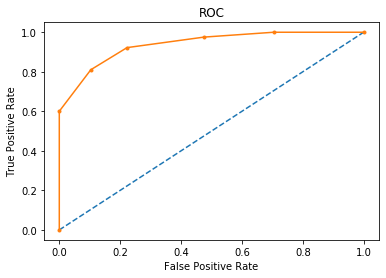

In [163]:
print('Scores and Curve for Training data is ')
roc_plot(KNN1,X_train,Y_train)

Scores and Curve for Testing data is 
roc_auc_score --> 0.8441474934530491


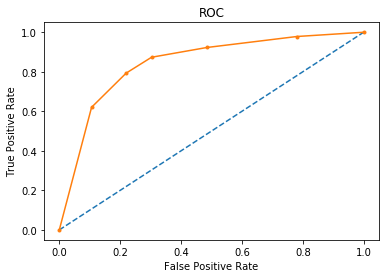

In [164]:
print('Scores and Curve for Testing data is ')
roc_plot(KNN1,X_test,Y_test)

### Naive Bayes

In [165]:
gNB1=GaussianNB()
gNB1.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [166]:
print(confusion_matrix(Y_train,gNB1.predict(X_train)))
print(classification_report(Y_train,gNB1.predict(X_train)))

[[230  98]
 [ 87 646]]
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       328
           1       0.87      0.88      0.87       733

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.79      1061
weighted avg       0.82      0.83      0.82      1061



In [167]:
print(confusion_matrix(Y_test,gNB1.predict(X_test)))
print(classification_report(Y_test,gNB1.predict(X_test)))

[[ 95  37]
 [ 33 291]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       132
           1       0.89      0.90      0.89       324

    accuracy                           0.85       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.85      0.85      0.85       456



Scores and Curve for Training data is 
roc_auc_score --> 0.8833935048081722


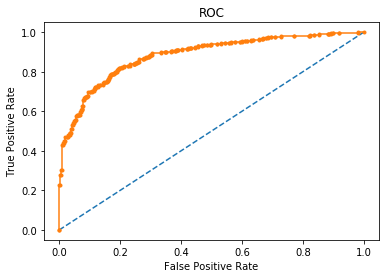

In [168]:
print('Scores and Curve for Training data is ')
roc_plot(gNB1,X_train,Y_train)

Scores and Curve for Testing data is 
roc_auc_score --> 0.8860596707818931


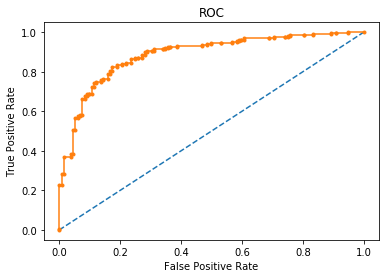

In [169]:
print('Scores and Curve for Testing data is ')
roc_plot(gNB1,X_test,Y_test)

### Support Vector Machine 

In [170]:
SVM_model1=SVC(random_state =0,probability=True)
SVM_model1.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [171]:
print(confusion_matrix(Y_train,SVM_model1.predict(X_train)))
print(classification_report(Y_train,SVM_model1.predict(X_train)))

[[240  88]
 [ 63 670]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       328
           1       0.88      0.91      0.90       733

    accuracy                           0.86      1061
   macro avg       0.84      0.82      0.83      1061
weighted avg       0.86      0.86      0.86      1061



In [172]:
print(confusion_matrix(Y_test,SVM_model1.predict(X_test)))
print(classification_report(Y_test,SVM_model1.predict(X_test)))

[[ 94  38]
 [ 36 288]]
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       132
           1       0.88      0.89      0.89       324

    accuracy                           0.84       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.84      0.84      0.84       456



Scores and Curve for Training data is 
roc_auc_score --> 0.9168344258476692


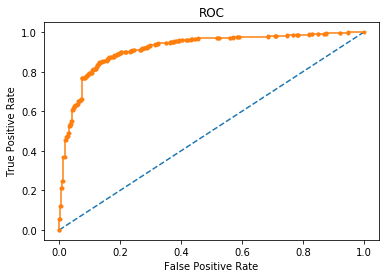

In [173]:
print('Scores and Curve for Training data is ')
roc_plot(SVM_model1,X_train,Y_train)

Scores and Curve for Testing data is 
roc_auc_score --> 0.8859193789749346


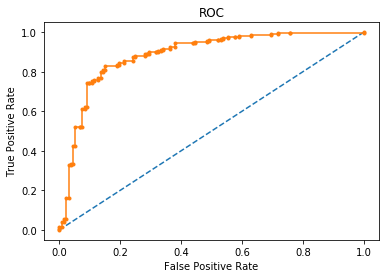

In [174]:
print('Scores and Curve for Testing data is ')
roc_plot(SVM_model1,X_test,Y_test)

### 1.6) Model Tuning, Bagging and Boosting.

### Adaptive Boosting

In [201]:
ADB_model1=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,n_estimators=500, random_state=0)
ADB_model1.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=500, random_state=0)

In [202]:
print(confusion_matrix(Y_train,ADB_model1.predict(X_train)))
print(classification_report(Y_train,ADB_model1.predict(X_train)))

[[227 101]
 [ 74 659]]
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       328
           1       0.87      0.90      0.88       733

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [203]:
print(confusion_matrix(Y_test,ADB_model1.predict(X_test)))
print(classification_report(Y_test,ADB_model1.predict(X_test)))

[[ 83  49]
 [ 31 293]]
              precision    recall  f1-score   support

           0       0.73      0.63      0.67       132
           1       0.86      0.90      0.88       324

    accuracy                           0.82       456
   macro avg       0.79      0.77      0.78       456
weighted avg       0.82      0.82      0.82       456



Scores and Curve for Training data is 
roc_auc_score --> 0.9084034871726616


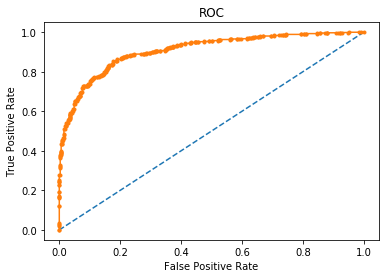

In [204]:
print('Scores and Curve for Training data is ')
roc_plot(ADB_model1,X_train,Y_train)

Scores and Curve for Testing data is 
roc_auc_score --> 0.8889005798728021


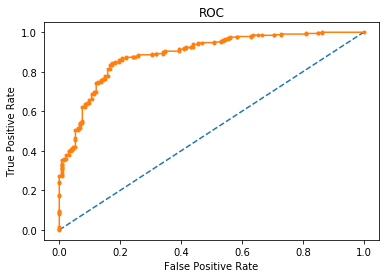

In [205]:
print('Scores and Curve for Testing data is ')
roc_plot(ADB_model1,X_test,Y_test)

### Xtreme Boosting

In [185]:
xgb1=xgb.XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=20, monotone_constraints=None,
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [186]:
xgb1.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=20, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [187]:
print(confusion_matrix(Y_train,xgb1.predict(X_train)))
print(classification_report(Y_train,xgb1.predict(X_train)))

[[235  93]
 [ 63 670]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       328
           1       0.88      0.91      0.90       733

    accuracy                           0.85      1061
   macro avg       0.83      0.82      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [188]:
print(confusion_matrix(Y_test,xgb1.predict(X_test)))
print(classification_report(Y_test,xgb1.predict(X_test)))

[[ 94  38]
 [ 34 290]]
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       132
           1       0.88      0.90      0.89       324

    accuracy                           0.84       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.84      0.84      0.84       456



Scores and Curve for Training data is 
roc_auc_score --> 0.9155845506272252


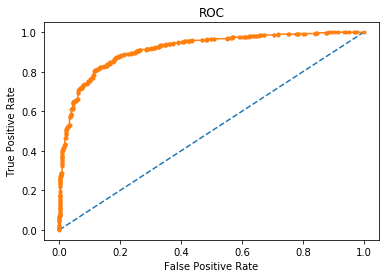

In [189]:
print('Scores and Curve for Training data is ')
roc_plot(xgb1,X_train,Y_train)

Scores and Curve for Testing data is 
roc_auc_score --> 0.8858959970071081


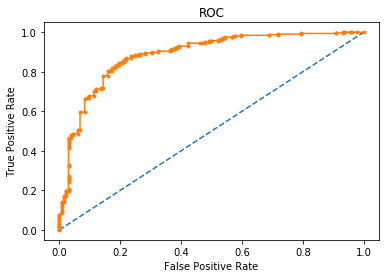

In [190]:
print('Scores and Curve for Testing data is ')
roc_plot(xgb1,X_test,Y_test)

### Decision Tree

In [191]:
DT_model1=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=70,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [192]:
DT_model1.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=70,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [193]:
print(confusion_matrix(Y_train,DT_model1.predict(X_train)))
print(classification_report(Y_train,DT_model1.predict(X_train)))

[[228 100]
 [ 88 645]]
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       328
           1       0.87      0.88      0.87       733

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061



In [194]:
print(confusion_matrix(Y_test,DT_model1.predict(X_test)))
print(classification_report(Y_test,DT_model1.predict(X_test)))

[[ 92  40]
 [ 40 284]]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       132
           1       0.88      0.88      0.88       324

    accuracy                           0.82       456
   macro avg       0.79      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456



Scores and Curve for Training data is 
roc_auc_score --> 0.8921696669217716


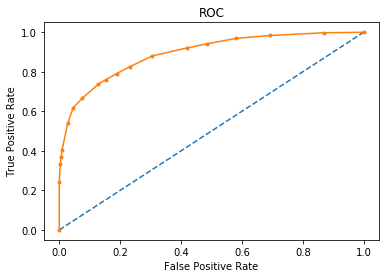

In [195]:
print('Scores and Curve for Training data is ')
roc_plot(DT_model1,X_train,Y_train)

Scores and Curve for Testing data is 
roc_auc_score --> 0.8752688926300037


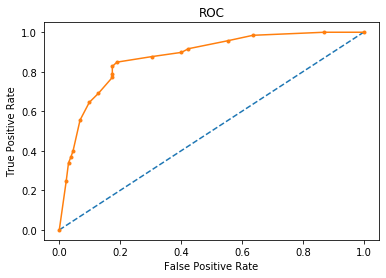

In [196]:
print('Scores and Curve for Testing data is ')
roc_plot(DT_model1,X_test,Y_test)

### Random Forest

In [197]:
RF_model1=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [198]:
RF_model1.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [199]:
print(confusion_matrix(Y_train,RF_model1.predict(X_train)))
print(classification_report(Y_train,RF_model1.predict(X_train)))

[[220 108]
 [ 54 679]]
              precision    recall  f1-score   support

           0       0.80      0.67      0.73       328
           1       0.86      0.93      0.89       733

    accuracy                           0.85      1061
   macro avg       0.83      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061



In [200]:
print(confusion_matrix(Y_test,RF_model1.predict(X_test)))
print(classification_report(Y_test,RF_model1.predict(X_test)))

[[ 83  49]
 [ 28 296]]
              precision    recall  f1-score   support

           0       0.75      0.63      0.68       132
           1       0.86      0.91      0.88       324

    accuracy                           0.83       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.83      0.83      0.83       456



Scores and Curve for Training data is 
roc_auc_score --> 0.9182049213056933


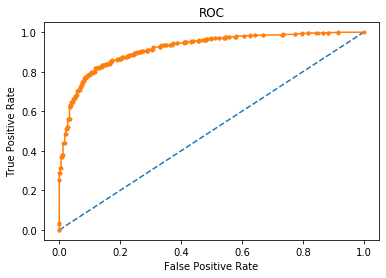

In [206]:
print('Scores and Curve for Training data is ')
roc_plot(RF_model1,X_train,Y_train)

Scores and Curve for Testing data is 
roc_auc_score --> 0.8943251964085297


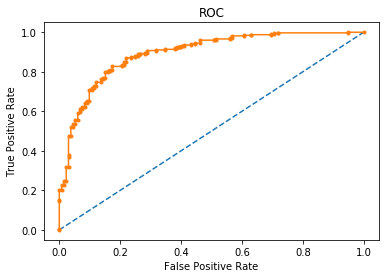

In [207]:
print('Scores and Curve for Testing data is ')
roc_plot(RF_model1,X_test,Y_test)

### 1.8) Based on these predictions, what are the insights?

#### 1)Comparing all the performance measure, Naïve Bayes model from second iteration is performing best. Although there are some other models such as SVM and Extreme Boosting which is performing almost same as that of Naïve Bayes. But Naïve Bayes model is very consistent when train and test results are compared with each other. Along with other parameters such as Recall value, AUC_SCORE and AUC_ROC_Curve, those results were pretty good is this model.

#### 2)Labour party is performing better than Conservative from huge margin.

#### 3)Female voters turn out is greater than the male voters.

#### 4)Those who have better national economic conditions are preferring to vote for Labour party.

#### 5)Persons having higher Eurosceptic sentiments conservative party are preferring to vote for Conservative party.

#### 6)Those who have higher political knowledge have voted for Conservative party

#### 7)Looking at the assessment for both the leaders, Labour Leader is performing well as he has got better ratings in assessment.